In [86]:
#@title Imports
import pandas as pd

vehicle_data = pd.read_csv("CO2 Emissions_Canada.csv")
flight_data = pd.read_csv("AirTravelEmissionsByMile.csv")
flight_data = flight_data.drop("lbs CO2e per km", axis=1)


# flight_data
# vehicle_data.head()

In [87]:
#@title Get Car CO2 Function
def get_car_co2(make, model):
  try:
    for i, row in vehicle_data.iterrows():
      if row['Make'] == make and row['Model'] == model:
        return row['CO2 Emissions(g/km)']
  except:
    #average grams per km if car is not found
    #https://www.epa.gov/greenvehicles/greenhouse-gas-emissions-typical-passenger-vehicle
    return 251


In [88]:
#@title Get Flight CO2 Function
def get_flight_co2_lbs_emissions(distance, seating_type):
  if distance == "Short Haul":
    flight_emissions = flight_data["lbs co2e per mile (2022)"].iloc[0]
  elif distance == "Medium Haul" and seating_type == "Average":
    flight_emissions = flight_data["lbs co2e per mile (2022)"].iloc[1]
  elif distance == "Medium Haul" and seating_type == "Economy":
    flight_emissions = flight_data["lbs co2e per mile (2022)"].iloc[2]
  elif distance == "Medium Haul" and seating_type == "Business/First":
    flight_emissions = flight_data["lbs co2e per mile (2022)"].iloc[3]
  elif distance == "Long Haul" and seating_type == "Average":
    flight_emissions = flight_data["lbs co2e per mile (2022)"].iloc[4]
  elif distance == "Long Haul" and seating_type == "Economy":
    flight_emissions = flight_data["lbs co2e per mile (2022)"].iloc[5]
  elif distance == "Long Haul" and seating_type == "Premium economy":
    flight_emissions = flight_data["lbs co2e per mile (2022)"].iloc[6]
  elif distance == "Long Haul" and seating_type == "Business":
    flight_emissions = flight_data["lbs co2e per mile (2022)"].iloc[7]
  elif distance == "Long Haul" and seating_type == "First":
    flight_emissions = flight_data["lbs co2e per mile (2022)"].iloc[8]
  elif distance == "Medium Haul":
    flight_emissions = flight_data["lbs co2e per mile (2022)"].iloc[1]
  elif distance == "Long Haul":
    flight_emissions = flight_data["lbs co2e per mile (2022)"].iloc[4]
  return(flight_emissions)

  


In [89]:
#@title Grams per km to total tons function
def grams_per_km_to_total_tons(grams_per_km, drive_distance):
  return (grams_per_km*0.00220462*1.609344*0.0005*drive_distance)

In [90]:
#@title Reset string and emissions data table
printstring = "Let's look at a summary of your travel emissions.\n"
emissionsdata = []
#RUN BEFORE DOING CODE BELOW


In [85]:
#@title Drive to airport inputs
#drive to airport

vehicle1_make = input("What was the make of the vehicle you took to the airport?").upper()
# print(vehicle1_make)

vehicle1_model = input("What was the model of the vehicle you took to the airport?").upper()
# print(vehicle1_model)

vehicle1_miles = int(input("How far was the drive from your home to the airport? (to nearest 1 mile)"))
drive1_emissions = grams_per_km_to_total_tons(get_car_co2(vehicle1_make, vehicle1_model), vehicle1_miles)
printstring+= "\nOn the drive to the airport (Drive 1), you drove "
printstring+= str(vehicle1_miles)
printstring+= " miles in a "
printstring+= vehicle1_make +" "+vehicle1_model
printstring+= "\nThat drive polluted "
printstring+= str(round(drive1_emissions,3))
printstring+= " tons of CO2\n"
emissionsdata.append(["Drive 1",drive1_emissions])


KeyboardInterrupt: ignored

In [11]:
#@title Flight to destination inputs
#flight to destination

num_stops_to_destination = int(input("How many stops did you have on your departing air travel? (0, 1, 2 etc..."))
legs_of_flight_to_destination = num_stops_to_destination+1
loop = 1
for i in range (legs_of_flight_to_destination):
  if(legs_of_flight_to_destination>1):
      print("How far did you fly on flight",loop, "(to the nearest mile)")
      flight_distance = int(input())
      flight_class = input("What class did you fly on that flight? (Economy, Premium Economy, Business, First, Other")
  else:
    flight_distance = int(input("How far was your flight (to the nearest mile)"))
    flight_class = input("What class did you fly on that flight? (Economy, Premium Economy, Business, First, Other")
  #set class_var
  if (flight_class == "Economy"):
    class_var = "Economy"
  elif (flight_distance<2230 and (flight_class == "First" or flight_class =="Business")):
    class_var = "Business/First"
  elif (flight_class == "Premium Economy"):
    class_var = "Premium economy"
  elif (flight_class == "First"):
    class_var = "First"
  elif (flight_class == "Business"):
    class_var = "Business"
  else:
    class_var = "Average"
  if (flight_distance < 746):
    dist_var = "Short Haul"
  elif (flight_distance >= 746 and flight_distance <2230):
    dist_var = "Medium Haul"
  else:
    dist_var = "Long Haul"
  flight_name = "Departure flight "+ str(loop)
  printstring+= "\n"+ flight_name + " was a "+ dist_var +" flight where you flew "+ str(flight_distance) + " miles in " + class_var + " class seating.\n"
  flight_emsissions_tons = get_flight_co2_lbs_emissions(dist_var, class_var)*flight_distance/2000
  printstring+= "Your emissions on that flight were "+ str(round(flight_emsissions_tons,3)) + " tons of CO2.\n"
  emissionsdata.append([flight_name,flight_emsissions_tons])
  loop+=1


How many stops did you have on your departing air travel? (0, 1, 2 etc...1
How far did you fly on flight 1 (to the nearest mile)
600
What class did you fly on that flight? (Economy, Premium Economy, Business, First, OtherEconomy
How far did you fly on flight 2 (to the nearest mile)
1000
What class did you fly on that flight? (Economy, Premium Economy, Business, First, OtherFirst


In [12]:
#@title Drive to hotel inputs
#drive to hotel

vehicle2_make = input("What was the make of the vehicle you took from the airport to your hotel?").upper()
# print(vehicle2_make)

vehicle2_model = input("What was the model of the vehicle you took from the airport to your hotel?").upper()
# print(vehicle2_model)

vehicle2_miles = int(input("How far was the drive from the airport to your hotel? (to nearest 1 mile)"))
drive2_emissions = grams_per_km_to_total_tons(get_car_co2(vehicle2_make, vehicle2_model), vehicle2_miles)
printstring+= "\nOn the drive to your hotel (Drive 2), you drove "
printstring+= str(vehicle2_miles)
printstring+= " miles in a "
printstring+= vehicle2_make +" "+vehicle2_model
printstring+= "\nThat drive polluted "
printstring+= str(round(drive2_emissions,2))
printstring+= " tons of CO2\n"
emissionsdata.append(["Drive 2",drive2_emissions])



What was the make of the vehicle you took from the airport to your hotel?Ford
What was the model of the vehicle you took from the airport to your hotel?Fusion
How far was the drive from the airport to your hotel? (to nearest 1 mile)15


In [14]:
#@title Additional driving input
#driving while at destination

other_driving_miles = int(input("About how many additional miles did you travel by car on your trip?"))
other_driving_emissions = other_driving_miles * 0.00044533377 #number is number of tons in 404 grams co2 (per mile co2 emissions of average car)

printstring+= "\nYou drove an additional "
printstring+= str(other_driving_miles)
printstring+= " miles while traveling, which polluted approximately "
printstring+= str(round(other_driving_emissions,3))
printstring+= " tons of CO2\n"
emissionsdata.append(["Other Driving",other_driving_emissions])

About how many additional miles did you travel by car on your trip?70


In [15]:
#@title Drive back to airport inputs
#drive back to airport

vehicle3_make = input("What was the make of the vehicle you took from your hotel to the airport?").upper()
# print(vehicle3_make)

vehicle3_model = input("What was the model of the vehicle you took from your hotel to the airport?").upper()
# print(vehicle3_model)

vehicle3_miles = int(input("How far was the drive from your hotel to the airport? (to nearest 1 mile)"))
drive3_emissions = grams_per_km_to_total_tons(get_car_co2(vehicle3_make, vehicle3_model), vehicle3_miles)
printstring+= "\nOn the drive to your hotel (Drive 3), you drove "
printstring+= str(vehicle3_miles)
printstring+= " miles in a "
printstring+= vehicle3_make +" "+vehicle3_model
printstring+= "\nThat drive polluted "
printstring+= str(round(drive3_emissions,3))
printstring+= " tons of CO2\n"
emissionsdata.append(["Drive 3",drive3_emissions])

What was the make of the vehicle you took from your hotel to the airport?Toyota
What was the model of the vehicle you took from your hotel to the airport?Prius
How far was the drive from your hotel to the airport? (to nearest 1 mile)15


In [16]:
#@title Return flight inputs
#return flight

num_stops_to_return = int(input("How many stops did you have on your returning air travel? (0, 1, 2 etc..."))
legs_of_flight_to_return = num_stops_to_return+1
loop = 1
for i in range (legs_of_flight_to_return):
  if(legs_of_flight_to_return>1):
      print("How far did you fly on flight",loop, "(to the nearest mile)")
      flight_distance = int(input())
      flight_class = input("What class did you fly on that flight? (Economy, Premium Economy, Business, First, Other")
  else:
    flight_distance = int(input("How far was your flight (to the nearest mile)"))
    flight_class = input("What class did you fly on that flight? (Economy, Premium Economy, Business, First, Other")
  #set class_var
  if (flight_class == "Economy"):
    class_var = "Economy"
  elif (flight_distance<2230 and (flight_class == "First" or flight_class =="Business")):
    class_var = "Business/First"
  elif (flight_class == "Premium Economy"):
    class_var = "Premium economy"
  elif (flight_class == "First"):
    class_var = "First"
  elif (flight_class == "Business"):
    class_var = "Business"
  else:
    class_var = "Average"
  if (flight_distance < 746):
    dist_var = "Short Haul"
  elif (flight_distance >= 746 and flight_distance <2230):
    dist_var = "Medium Haul"
  else:
    dist_var = "Long Haul"
  flight_name = "Return flight "+ str(loop)
  printstring+= "\n"+ flight_name + " was a "+ dist_var +" flight where you flew "+ str(flight_distance) + " miles in " + class_var + " class seating.\n"
  flight_emsissions_tons = get_flight_co2_lbs_emissions(dist_var, class_var)*flight_distance/2000
  printstring+= "Your emissions on that flight were "+ str(round(flight_emsissions_tons,3)) + " tons of CO2.\n"
  emissionsdata.append([flight_name,flight_emsissions_tons])
  loop+=1

How many stops did you have on your returning air travel? (0, 1, 2 etc...0
How far was your flight (to the nearest mile)1600
What class did you fly on that flight? (Economy, Premium Economy, Business, First, OtherEconomy


In [17]:
#@title Drive home from airport inputs
#drive back home from airport

vehicle4_make = input("What was the make of the vehicle you took from the airport to your home?").upper()
# print(vehicle4_make)

vehicle4_model = input("What was the model of the vehicle you took from the airport to your home?").upper()
# print(vehicle4_model)

vehicle4_miles = int(input("How far was the drive from the airport to your home? (to nearest 1 mile)"))
drive4_emissions = grams_per_km_to_total_tons(get_car_co2(vehicle4_make, vehicle4_model), vehicle4_miles)
printstring+= "\nOn the drive home (Drive 4), you drove "
printstring+= str(vehicle4_miles)
printstring+= " miles in a "
printstring+= vehicle4_make +" "+vehicle4_model
printstring+= "\nThat drive polluted "
printstring+= str(round(drive4_emissions,3))
printstring+= " tons of CO2\n"
emissionsdata.append(["Drive 4",drive4_emissions])


What was the make of the vehicle you took from the airport to your home?Nissan
What was the model of the vehicle you took from the airport to your home?Sentra
How far was the drive from the airport to your home? (to nearest 1 mile)30


In [64]:
#@title Summary Output
import matplotlib.pyplot as plt
emissionsdata_df = pd.DataFrame(emissionsdata, columns = ["Travel Type", "Emissions (Tons CO2)"])
emissionsdata_df["Explode"] = 0

def size(x):
  if x < .1:
    return .7
  else:
    return .1
emissionsdata_df["Explode"] = emissionsdata_df["Emissions (Tons CO2)"].apply(size)

trees_to_plant = round((emissionsdata_df['Emissions (Tons CO2)'].sum()*38.5),0)
print(printstring)
total_emissions = round(emissionsdata_df['Emissions (Tons CO2)'].sum(),3)
print("\nYour total emissions for this trip were", total_emissions, "Tons of CO2")

#31-46 trees per ton (Avg 38.5)
print("To offset those emissions, you would need to plant about", str(trees_to_plant), "trees.")
for i in range(int(trees_to_plant)):
  print("🌲",end = " ")

print("\n")

Let's look at a summary of your travel emissions.

On the drive to the airport (Drive 1), you drove 20 miles in a HONDA CIVIC
That drive polluted 0.006 tons of CO2

Departure flight 1 was a Short Haul flight where you flew 600 miles in Economy class seating.
Your emissions on that flight were 0.2617035555 tons of CO2.

Departure flight 2 was a Medium Haul flight where you flew 1000 miles in Business/First class seating.
Your emissions on that flight were 0.4018452745 tons of CO2.

On the drive to your hotel (Drive 2), you drove 15 miles in a FORD FUSION
That drive polluted 0.01 tons of CO2

You drove an additional 70 miles while traveling, which polluted approximately 0.031 tons of CO2

On the drive to your hotel (Drive 3), you drove 15 miles in a TOYOTA PRIUS
That drive polluted 0.003 tons of CO2

Return flight 1 was a Medium Haul flight where you flew 1600 miles in Economy class seating.
Your emissions on that flight were 0.42865212560000004 tons of CO2.

On the drive home (Drive 4),


Let's look at a breakdown of your emissions for this trip.


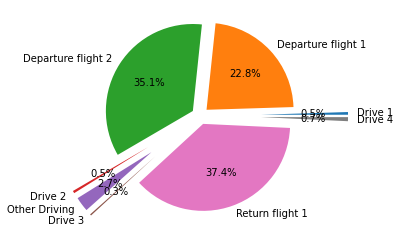



       Travel Type  Emissions (Tons CO2)
           Drive 1              0.005712
Departure flight 1              0.261704
Departure flight 2              0.401845
           Drive 2              0.005216
     Other Driving              0.031173
           Drive 3              0.002927
   Return flight 1              0.428652
           Drive 4              0.008568
   Total Emissions              1.145798


In [65]:
#@title Emissions visuals
print("\nLet's look at a breakdown of your emissions for this trip.")

piechart = plt.pie(emissionsdata_df["Emissions (Tons CO2)"], labels = emissionsdata_df["Travel Type"], explode = emissionsdata_df["Explode"], autopct = '%2.1f%%')
plt.show(piechart)

emissionsdata_df.loc[len(emissionsdata_df.index)] = ["Total Emissions", emissionsdata_df['Emissions (Tons CO2)'].sum(), 0]
print("\n")
printable_df = emissionsdata_df[['Travel Type',"Emissions (Tons CO2)"]]
print(printable_df.to_string(index=False))



In [77]:
#@title Offset Options
print("\nThere are several options to purchase carbon offsets to minimize your emissions footprint. Here are a few:")
print("\n")
print('\033[1m',"Native Energy",'\033[0m')
print("Native carbon offset purchases support anything from clean water projects to regenerative aggriculture to energy efficient infrastrure.")
print("Native estimates that for every $15.50 spent on a carbon-reducing project, they can keep 1 ton of CO2 out of the atmosphere.")
print("Using those estimates, it would cost about $"'\033[1m',round(total_emissions*15.5,2),'\033[0m'"to offset your travel emissions through Native Energy.")
print("\n")
print('\033[1m',"myclimate",'\033[0m')
print("myclimate carbon offset purchases fund climate protection projects involving renewables, sustainable international development, and reforestation projects.")
print("myclimate estimates that for every $30.00 spent on a carbon-reducing project, they can keep 1 ton of CO2 out of the atmosphere.")
print("Using those estimates, it would cost about $"'\033[1m',round(total_emissions*30,2),'\033[0m'"to offset your travel emissions through myclimate.")
print("\n")
print('\033[1m',"Sustainable Travel International",'\033[0m')
print("Sustainable Travel International carbon offset purchases fund clean energy, biodiversity projects, and support local communities.")
print("Sustainable Travel International estimates that for every $16.00 spent on a carbon-reducing project, they can keep 1 ton of CO2 out of the atmosphere.")
print("Using those estimates, it would cost about $"'\033[1m',round(total_emissions*16,2),'\033[0m'"to offset your travel emissions with Sustainable Travel International.")


There are several options to purchase carbon offsets to minimize your emissions footprint. Here are a few:


 Native Energy 
Native carbon offset purchases support anything from clean water projects to regenerative aggriculture to energy efficient infrastrure.
Native estimates that for every $15.50 spent on a carbon-reducing project, they can keep 1 ton of CO2 out of the atmosphere.
Using those estimates, it would cost about $ 17.76 to offset your travel emissions through Native Energy.


 myclimate 
myclimate carbon offset purchases fund climate protection projects involving renewables, sustainable international development, and reforestation projects.
myclimate estimates that for every $30.00 spent on a carbon-reducing project, they can keep 1 ton of CO2 out of the atmosphere.
Using those estimates, it would cost about $ 34.38 to offset your travel emissions through myclimate.


 Sustainable Travel International 
Sustainable Travel International carbon offset purchases fund clean en